In [1]:
# tensorflow
import tensorflow as tf
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

In [2]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [3]:
import numpy as np 
import tensorflow as tf
from tensorflow.keras.models import load_model
# from sklearn.preprocessing import LabelEncoder
# from sklearn.metrics import accuracy_score

In [ ]:
# loading the archiecture of "inception_resnet_v1"

def load_model():
    model_path = "tf_files\\keras-facenet-tf23"
    model = tf.keras.models.load_model(model_path)
    model.load_weights('tf_files\\keras-facenet-h5\\model.h5')
    return model

target_model = load_model()

In [ ]:
target_model.summary()

Model: "inception_resnet_v1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 160, 160, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv2d_1a_3x3 (Conv2D)         (None, 79, 79, 32)   864         ['input_1[0][0]']                
                                                                                                  
 Conv2d_1a_3x3_BatchNorm (Batch  (None, 79, 79, 32)  96          ['Conv2d_1a_3x3[0][0]']          
 Normalization)                                                                                   
                                                                                

In [ ]:
# dividing the data into train & validation
import os
import shutil
import random

def split_dataset(root_dir, train_dir, test_dir, test_ratio=0.2):
    if not os.path.exists(train_dir):
        os.makedirs(train_dir)
    if not os.path.exists(test_dir):
        os.makedirs(test_dir)

    for person in os.listdir(root_dir):
        person_dir = os.path.join(root_dir, person)
        if os.path.isdir(person_dir):
            images = os.listdir(person_dir)
            random.shuffle(images)
            
            if len(images) == 1:
                train_images = images
                test_images = []
            else:
                split_idx = max(1, int(len(images) * (1 - test_ratio)))
                train_images = images[:split_idx]
                test_images = images[split_idx:]

            train_person_dir = os.path.join(train_dir, person)
            test_person_dir = os.path.join(test_dir, person)
            os.makedirs(train_person_dir, exist_ok=True)
            os.makedirs(test_person_dir, exist_ok=True)

            for image in train_images:
                shutil.copy(os.path.join(person_dir, image), os.path.join(train_person_dir, image))
            for image in test_images:
                shutil.copy(os.path.join(person_dir, image), os.path.join(test_person_dir, image))

root_dir = 'D:\\Internship\\Adversarial_Evasion_Attack\\casia_128'
train_dir = 'D:\\Internship\\train_128'
test_dir = 'D:\\Internship\\test_128'

split_dataset(root_dir, train_dir, test_dir)

In [5]:
# loading data from directory

import tensorflow as tf
# generators
train_ds = tf.keras.utils.image_dataset_from_directory(
    directory = 'Adversarial_Evasion_Attack\\train_casia',
    labels='inferred',
    label_mode = 'categorical',
    batch_size=32,
    image_size=(160,160)
)

validation_ds = tf.keras.utils.image_dataset_from_directory(
    directory = 'Adversarial_Evasion_Attack\\test_casia',
    labels='inferred',
    label_mode = 'categorical',
    batch_size=32,
    image_size=(160,160)
)

Found 388297 files belonging to 10572 classes.
Found 102326 files belonging to 10572 classes.


In [7]:
# Normalize the images
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [ ]:
# loading the model again by romving last 5 layers
def load_model():
    model_path = "tf_files\\keras-facenet-tf23"
    model = tf.keras.models.load_model(model_path)
    model.load_weights('tf_files\\keras-facenet-h5\\model.h5')
    base_model = tf.keras.Model(inputs = model.input, outputs = model.layers[-5].output)
    return base_model

base_model = load_model()

In [9]:
base_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 160, 160, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv2d_1a_3x3 (Conv2D)         (None, 79, 79, 32)   864         ['input_1[0][0]']                
                                                                                                  
 Conv2d_1a_3x3_BatchNorm (Batch  (None, 79, 79, 32)  96          ['Conv2d_1a_3x3[0][0]']          
 Normalization)                                                                                   
                                                                                              

(160, 160, 3)


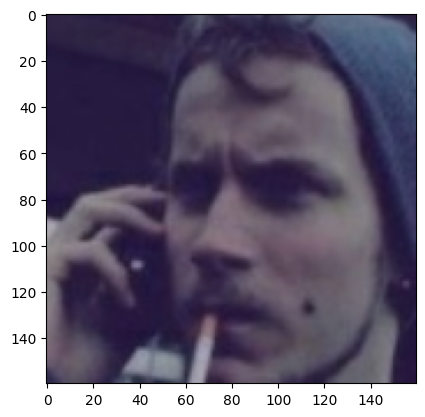

In [10]:
import matplotlib.pyplot as plt
for i, j in train_ds.take(1):
    print(i[1].shape)
    image = i[1]
    plt.imshow(image)
    plt.show()

In [11]:
# make all the remaining layers false for training
for layers in base_model.layers:
    layers.trainable = False
    print(layers.name, layers.trainable)    

input_1 False
Conv2d_1a_3x3 False
Conv2d_1a_3x3_BatchNorm False
Conv2d_1a_3x3_Activation False
Conv2d_2a_3x3 False
Conv2d_2a_3x3_BatchNorm False
Conv2d_2a_3x3_Activation False
Conv2d_2b_3x3 False
Conv2d_2b_3x3_BatchNorm False
Conv2d_2b_3x3_Activation False
MaxPool_3a_3x3 False
Conv2d_3b_1x1 False
Conv2d_3b_1x1_BatchNorm False
Conv2d_3b_1x1_Activation False
Conv2d_4a_3x3 False
Conv2d_4a_3x3_BatchNorm False
Conv2d_4a_3x3_Activation False
Conv2d_4b_3x3 False
Conv2d_4b_3x3_BatchNorm False
Conv2d_4b_3x3_Activation False
Block35_1_Branch_2_Conv2d_0a_1x1 False
Block35_1_Branch_2_Conv2d_0a_1x1_BatchNorm False
Block35_1_Branch_2_Conv2d_0a_1x1_Activation False
Block35_1_Branch_1_Conv2d_0a_1x1 False
Block35_1_Branch_2_Conv2d_0b_3x3 False
Block35_1_Branch_1_Conv2d_0a_1x1_BatchNorm False
Block35_1_Branch_2_Conv2d_0b_3x3_BatchNorm False
Block35_1_Branch_1_Conv2d_0a_1x1_Activation False
Block35_1_Branch_2_Conv2d_0b_3x3_Activation False
Block35_1_Branch_0_Conv2d_1x1 False
Block35_1_Branch_1_Conv2d_0b_

In [12]:
from tensorflow.keras.layers import GlobalAveragePooling2D, Dropout, Dense, BatchNormalization, Softmax

In [13]:
#Self defined layers for training
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.3)(x)
x = Dense(128, activation='relu')(x)
x = BatchNormalization()(x)
predictions = Dense(10572, activation='softmax')(x)

In [14]:
final_model = tf.keras.Model(inputs =base_model.input,outputs = predictions )

In [15]:
from tensorflow.keras.optimizers import Adam

In [16]:
# compile
final_model.compile(
    optimizer = Adam(learning_rate = 1e-5),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [17]:
from tensorflow.keras.callbacks import ModelCheckpoint

# checkpoint callback
checkpoint_callback = ModelCheckpoint(
    filepath='checkpoint.h5',  # Path where the model will be saved
    save_weights_only=True,           # Whether to save only the model weights
    save_best_only=False,             # Whether to save only the best model
    save_freq='epoch'                 # Frequency to save the model (in this case, every epoch)
)

In [ ]:
# model training
fine_tunned_facenet = final_model.fit(
    train_ds,
    epochs=30,
    validation_data=validation_ds,
    callbacks=[checkpoint_callback]
)

In [16]:
# save the model
final_model.save("facenet_casia")

In [17]:
# load saved model
test = tf.keras.models.load_model("facenet_casia")

1/1 [==============================] - 4s 4s/step


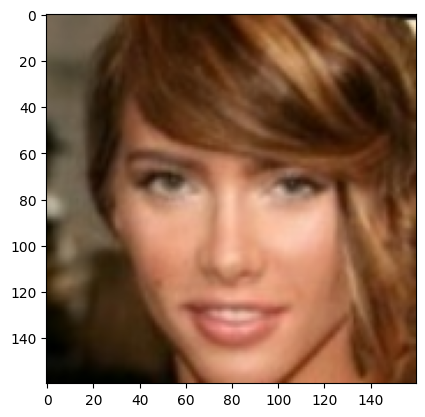

True Label: 8555
Predicted Label: 8555, Confidence: 0.35698044300079346


In [18]:

for images, labels in validation_ds.take(1):
    input_image = images[0]
    true_label = labels[0]
    true_label_index = np.argmax(true_label)
    prediction = test.predict(np.expand_dims(input_image, axis=0))
    predicted_label = np.argmax(prediction)
    confidence = np.max(prediction)
    plt.imshow(input_image)
    plt.show()
    print(f"True Label: {true_label_index}")
    print(f"Predicted Label: {predicted_label}, Confidence: {confidence}")

In [19]:
# check all the layers
for i, layer in enumerate(test.layers):
   print(i, layer.name)


0 input_1
1 Conv2d_1a_3x3
2 Conv2d_1a_3x3_BatchNorm
3 Conv2d_1a_3x3_Activation
4 Conv2d_2a_3x3
5 Conv2d_2a_3x3_BatchNorm
6 Conv2d_2a_3x3_Activation
7 Conv2d_2b_3x3
8 Conv2d_2b_3x3_BatchNorm
9 Conv2d_2b_3x3_Activation
10 MaxPool_3a_3x3
11 Conv2d_3b_1x1
12 Conv2d_3b_1x1_BatchNorm
13 Conv2d_3b_1x1_Activation
14 Conv2d_4a_3x3
15 Conv2d_4a_3x3_BatchNorm
16 Conv2d_4a_3x3_Activation
17 Conv2d_4b_3x3
18 Conv2d_4b_3x3_BatchNorm
19 Conv2d_4b_3x3_Activation
20 Block35_1_Branch_2_Conv2d_0a_1x1
21 Block35_1_Branch_2_Conv2d_0a_1x1_BatchNorm
22 Block35_1_Branch_2_Conv2d_0a_1x1_Activation
23 Block35_1_Branch_1_Conv2d_0a_1x1
24 Block35_1_Branch_2_Conv2d_0b_3x3
25 Block35_1_Branch_1_Conv2d_0a_1x1_BatchNorm
26 Block35_1_Branch_2_Conv2d_0b_3x3_BatchNorm
27 Block35_1_Branch_1_Conv2d_0a_1x1_Activation
28 Block35_1_Branch_2_Conv2d_0b_3x3_Activation
29 Block35_1_Branch_0_Conv2d_1x1
30 Block35_1_Branch_1_Conv2d_0b_3x3
31 Block35_1_Branch_2_Conv2d_0c_3x3
32 Block35_1_Branch_0_Conv2d_1x1_BatchNorm
33 Block35_1_B

In [20]:
# freze first 327 layers and all other to true for re-training 
for layer in test.layers[:327]:
   layer.trainable = False
for layer in test.layers[327:]:
   layer.trainable = True

In [21]:
from keras.optimizers import Adam
test.compile(optimizer=Adam(lr=0.0001), loss='categorical_crossentropy', metrics= ["accuracy"])

c:\Users\IDEA Lab\.conda\envs\py310\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [ ]:
# re-training
test.fit(train_ds, epochs= 4, validation_data = validation_ds )

In [ ]:
test.save("final_model")

In [22]:
test = tf.keras.models.load_model("D:\\Internship\\final_model")

1/1 [==============================] - 1s 1s/step


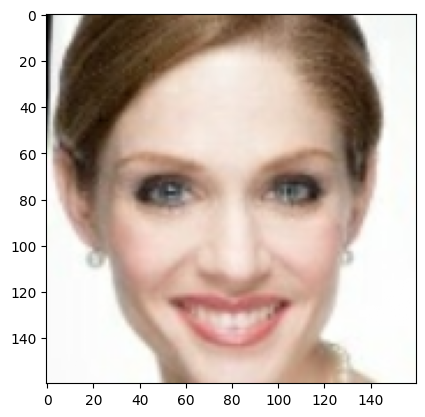

True Label: 8574
Predicted Label: 8574, Confidence: 0.9945847392082214


In [23]:
for images, labels in validation_ds.take(1):
    input_image = images[0]
    true_label = labels[0]
    true_label_index = np.argmax(true_label)
    prediction = test.predict(np.expand_dims(input_image, axis=0))
    predicted_label = np.argmax(prediction)
    confidence = np.max(prediction)
    plt.imshow(input_image)
    plt.show()
    print(f"True Label: {true_label_index}")
    print(f"Predicted Label: {predicted_label}, Confidence: {confidence}")